# All Sites Atmospheric Pressure

The idea here is to trawl all sites and see what the stats are when things are going pretty good. Also comparing raw with processed should be interesint

In [47]:
import matplotlib

matplotlib.use("module://ipympl.backend_nbagg")
from hilltoppy import web_service as ws
import hydro_processing_tools.data_acquisition as data_acquisition
import hydro_processing_tools.utilities as utilities
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
base_url = "http://hilltopdev.horizons.govt.nz/"
hts = "RawLoggerNet.hts"
# site = "Manawatu at Foxton"
# measurement = "Atmospheric Pressure"
# from_date = None
# to_date = None
# parameters=True
# quality_codes=True
# dtl_method="trend"

In [23]:
sites_out1 = ws.site_list(base_url, hts, measurement="Atmospheric Pressure")
display(sites_out1)

,SiteName
0,Air Quality at Taihape
1,Air Quality at Taumarunui
2,Akitio at Cadmus Bridge
3,Arawhata Drain at Hokio Beach Road Trial
4,Hokio at Lake Horowhenua
5,Lake Horowhenua at Buoy
6,Lake Horowhenua at Weir
7,Lake Koitiata
8,Lake Waipu
9,Manawatu at Foxton


In [30]:
for i, site in sites_out1.iterrows():
    print(site)
    name = site.SiteName
    try:
        atm_data = ws.get_data(base_url, hts, name, "Atmospheric Pressure")
    except ValueError as e:
        print(e)
    atm_data = atm_data.set_index("Time")
    atm_data.index = pd.to_datetime(atm_data.index)
    atm_data = atm_data.asfreq("15T")
    print(f"Gaps: {atm_data['Value'].isna().sum()}")
    display(atm_data["Value"].describe())

SiteName    Air Quality at Taihape
Name: 0, dtype: object


'Gaps: 224'

count     53270.000
unique    21955.000
top         724.877
freq         11.000
Name: Value, dtype: float64

SiteName    Air Quality at Taumarunui
Name: 1, dtype: object


'Gaps: 2658'

count     88169
unique    27182
top           0
freq        566
Name: Value, dtype: int64

SiteName    Akitio at Cadmus Bridge
Name: 2, dtype: object


'Gaps: 2'

count    67302.000000
mean       972.235815
std        122.378224
min        571.560000
25%       1003.720000
50%       1012.020000
75%       1018.690000
max       1037.040000
Name: Value, dtype: float64

SiteName    Arawhata Drain at Hokio Beach Road Trial
Name: 3, dtype: object


'Gaps: 82'

count    41186.000000
mean         1.341951
std         20.482222
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        337.880000
Name: Value, dtype: float64

SiteName    Hokio at Lake Horowhenua
Name: 4, dtype: object


'Gaps: 6'

count    43400.000000
mean      1015.546362
std          9.684790
min        602.500000
25%       1010.400000
50%       1015.700000
75%       1021.900000
max       1042.300000
Name: Value, dtype: float64

SiteName    Lake Horowhenua at Buoy
Name: 5, dtype: object


'Gaps: 4087'

count    146625.000000
mean       1016.242868
std          11.038726
min         602.500000
25%        1010.700000
50%        1016.900000
75%        1022.800000
max        1042.300000
Name: Value, dtype: float64

SiteName    Lake Horowhenua at Weir
Name: 6, dtype: object


'Gaps: 4541'

count    292453.000000
mean       1014.996703
std          10.144274
min          13.300000
25%        1009.400000
50%        1015.600000
75%        1021.500000
max        1042.300000
Name: Value, dtype: float64

SiteName    Lake Koitiata
Name: 7, dtype: object


'Gaps: 0'

count    106364.000000
mean       1012.612062
std           9.125160
min         974.445000
25%        1007.260000
50%        1013.280000
75%        1018.870000
max        1037.080000
Name: Value, dtype: float64

SiteName    Lake Waipu
Name: 8, dtype: object


'Gaps: 16311'

count    12364.000000
mean      1016.750943
std          9.851373
min         -0.010010
25%       1012.250000
50%       1018.800000
75%       1020.050000
max       1021.970000
Name: Value, dtype: float64

SiteName    Manawatu at Foxton
Name: 9, dtype: object


'Gaps: 1073'

count    295921.000000
mean       1015.477949
std           9.266843
min         700.864000
25%        1009.680000
50%        1016.090000
75%        1021.880000
max        1095.120000
Name: Value, dtype: float64

SiteName    Manawatu at Hopelands
Name: 10, dtype: object


'Gaps: 13573'

count    283421.000000
mean       1004.388664
std           8.980461
min         966.520000
25%         998.850000
50%        1005.060000
75%        1010.620000
max        1029.070000
Name: Value, dtype: float64

SiteName    Manawatu at Te Ao Nui
Name: 11, dtype: object


'Gaps: 46822'

count    45419.000000
mean    -38973.091431
std      49425.891530
min     -99837.100000
25%     -99837.100000
50%       1154.510000
75%       1166.010000
max       1186.610000
Name: Value, dtype: float64

SiteName    Manawatu at Teachers College
Name: 12, dtype: object


'Gaps: 761'

count    296234.000000
mean       1013.243599
std           8.971700
min         974.830000
25%        1007.740000
50%        1013.950000
75%        1019.460000
max        1039.030000
Name: Value, dtype: float64

SiteName    Manawatu at Victoria Ave
Name: 13, dtype: object


'Gaps: 106855'

count    144671.000000
mean       1011.782698
std           9.093279
min         975.710000
25%        1006.310000
50%        1012.470000
75%        1017.890000
max        1036.390000
Name: Value, dtype: float64

SiteName    Manawatu at Weber Road
Name: 14, dtype: object


'Gaps: 913'

count    251092.000000
mean        995.840396
std           8.983567
min         957.920000
25%         990.300000
50%         996.490000
75%        1002.160000
max        1038.010000
Name: Value, dtype: float64

SiteName    Mangatainoka at Pahiatua Town Bridge
Name: 15, dtype: object


'Gaps: 605'

count    296389.000000
mean       1002.295141
std           9.021954
min         964.200000
25%         996.700000
50%        1003.000000
75%        1008.600000
max        1027.500000
Name: Value, dtype: float64

SiteName    Oroua at Almadale Slackline
Name: 16, dtype: object


'Gaps: 4'

count    11514.000000
mean       997.256892
std          9.780284
min        965.890000
25%        991.830000
50%        998.005000
75%       1003.837500
max       1019.090000
Name: Value, dtype: float64

SiteName    Owahanga at Owahanga Station
Name: 17, dtype: object


'Gaps: 1224'

count    59441.00000
mean      1012.89913
std          9.86959
min        724.95000
25%       1007.25000
50%       1013.71000
75%       1019.76000
max       1037.32000
Name: Value, dtype: float64

SiteName    Rangitikei at Mangaweka
Name: 18, dtype: object


'Gaps: 33607'

count    263387.000000
mean        984.761668
std           8.591010
min         667.490000
25%         979.760000
50%         985.390000
75%         990.910000
max        1009.070000
Name: Value, dtype: float64

SiteName    Rangitikei at McKelvies
Name: 19, dtype: object


'Gaps: 104'

count    33603.000000
mean      1013.285842
std          9.367057
min        589.060000
25%       1008.470000
50%       1013.910000
75%       1019.440000
max       1035.180000
Name: Value, dtype: float64

SiteName    Rangitikei at Onepuhi
Name: 20, dtype: object


'Gaps: 11156'

count    272876.000000
mean        993.796414
std          68.760397
min         583.180000
25%         999.750000
50%        1006.320000
75%        1011.880000
max        1102.210000
Name: Value, dtype: float64

SiteName    Te Matai Road Aquifer 1
Name: 21, dtype: object


'Gaps: 7981'

count    10021.000000
mean      1010.970063
std          8.652318
min        982.800000
25%       1007.200000
50%       1012.200000
75%       1016.600000
max       1032.900000
Name: Value, dtype: float64

SiteName    Turakina at Waipu
Name: 22, dtype: object


'Gaps: 0'

count    32361.000000
mean       602.895114
std         12.569078
min        590.600000
25%        593.700000
50%        597.900000
75%        609.000000
max        736.700000
Name: Value, dtype: float64

SiteName    Wainui at Herbertville Road Br
Name: 23, dtype: object


'Gaps: 16843'

count    43838.000000
mean       966.609235
std        107.197732
min        720.060000
25%       1001.190000
50%       1011.660000
75%       1018.600000
max       1036.680000
Name: Value, dtype: float64

SiteName    Whangaehu at Karioi Pulpmill
Name: 24, dtype: object


'Gaps: 39751'

count    39752.000000
mean      1086.914299
std          8.128475
min       1052.510000
25%       1082.310000
50%       1087.610000
75%       1092.510000
max       1109.510000
Name: Value, dtype: float64

SiteName    Whangaehu at Tukino
Name: 25, dtype: object


'Gaps: 18212'

count    90170.000000
mean       830.991379
std          7.402493
min        803.363000
25%        826.540000
50%        832.101000
75%        836.095000
max        847.528000
Name: Value, dtype: float64

SiteName    Whanganui at Te Rewa
Name: 26, dtype: object


'Gaps: 96'

count    79403.000000
mean      1013.999335
std          8.980772
min        975.030000
25%       1008.880000
50%       1014.660000
75%       1020.040000
max       1039.390000
Name: Value, dtype: float64

SiteName    Whanganui at Town Bridge
Name: 27, dtype: object


'Gaps: 783'

count    296211.000000
mean       1009.083968
std          46.644038
min         369.600000
25%        1010.000000
50%        1016.000000
75%        1022.000000
max        1042.000000
Name: Value, dtype: float64

## Drilling down into an example site

This example has many gaps, so there is want for some gap finding/filling methods

In [65]:
site_name = "Owahanga at Owahanga Station"
site_data = ws.get_data(
    base_url,
    hts,
    site_name,
    "Atmospheric Pressure",
    from_date="2023-05-01 11:30",
    to_date="2023-10-12 08:30",
)
site_data = site_data.set_index("Time")
site_data.index = pd.to_datetime(site_data.index)
site_data = site_data.asfreq("15T")
display(site_data)

,SiteName,MeasurementName,Value
Time,,,
2023-05-01 11:30:00,Owahanga at Owahanga Station,Atmospheric Pressure,1022.92
2023-05-01 11:45:00,Owahanga at Owahanga Station,Atmospheric Pressure,1022.81
2023-05-01 12:00:00,Owahanga at Owahanga Station,Atmospheric Pressure,1022.61
2023-05-01 12:15:00,Owahanga at Owahanga Station,Atmospheric Pressure,1022.74
2023-05-01 12:30:00,Owahanga at Owahanga Station,Atmospheric Pressure,1022.46
...,...,...,...
2023-10-12 07:30:00,Owahanga at Owahanga Station,Atmospheric Pressure,1007.18
2023-10-12 07:45:00,Owahanga at Owahanga Station,Atmospheric Pressure,1007.18
2023-10-12 08:00:00,Owahanga at Owahanga Station,Atmospheric Pressure,1007.10


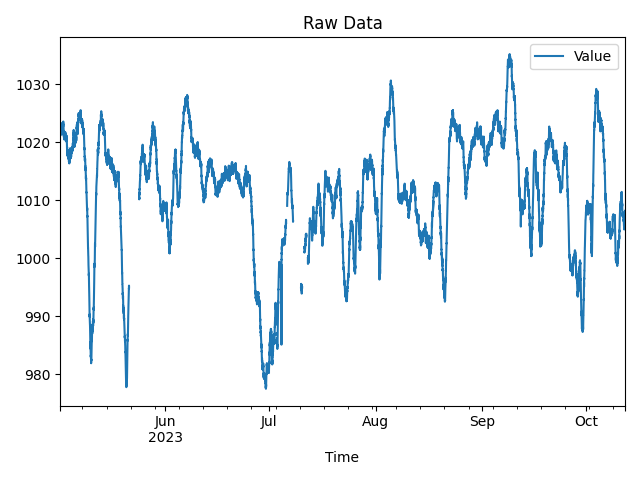

In [66]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 1, 1)
site_data.plot()
plt.title("Raw Data")
plt.legend()
plt.tight_layout()
plt.show()

Now we can find all the missing data with isna()

In [80]:
nans = site_data[site_data["Value"].isnull() == True].index
print(nans)

DatetimeIndex(['2023-05-21 12:30:00', '2023-05-21 12:45:00',
               '2023-05-21 13:00:00', '2023-05-21 13:15:00',
               '2023-05-21 13:30:00', '2023-05-21 13:45:00',
               '2023-05-21 14:00:00', '2023-05-21 14:15:00',
               '2023-05-21 14:30:00', '2023-05-21 14:45:00',
               ...
               '2023-07-12 06:45:00', '2023-07-12 07:00:00',
               '2023-07-12 07:15:00', '2023-07-12 07:30:00',
               '2023-07-12 07:45:00', '2023-07-12 08:00:00',
               '2023-07-12 08:15:00', '2023-07-12 08:30:00',
               '2023-07-12 08:45:00', '2023-07-12 09:00:00'],
              dtype='datetime64[ns]', name='Time', length=709, freq=None)


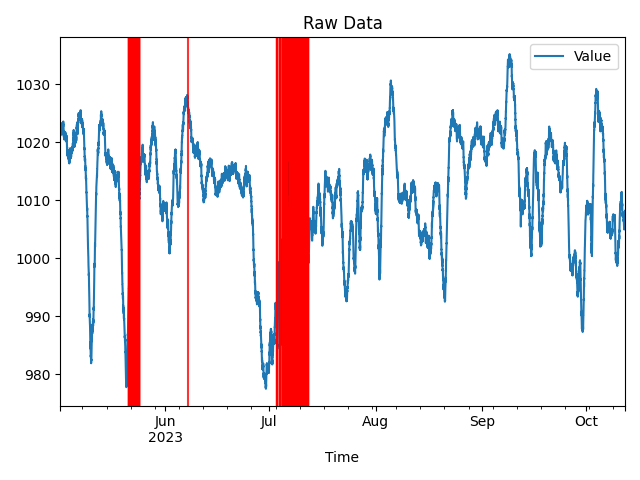

In [86]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 1, 1)
ax = site_data.plot()
for nan in nans:
    ax.axvline(x=nan, color="red", alpha=0.8)
plt.title("Raw Data")
plt.legend()
plt.tight_layout()
plt.show()